# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology

## Final Project

In [1]:
#@title Enter your information & "RUN the cell!!"

student_id =  99104781 #@param {type:"integer"}
student_name = "Mohammad Hossein Shafizadegan" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99104781
your name: Mohammad Hossein Shafizadegan


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import pandas as pd

### Question 5

Reconstruct the figure 6 of the article. A graphical representation of the reports’ means based on individual participants (x-axis) and the series type (separate lines).

In [3]:
df_dict = pd.read_excel("Introspective data file.xlsx", sheet_name=None)

M_df = df_dict['M(A)']
W_df = df_dict['W(A)']
S_df = df_dict['S(A)']


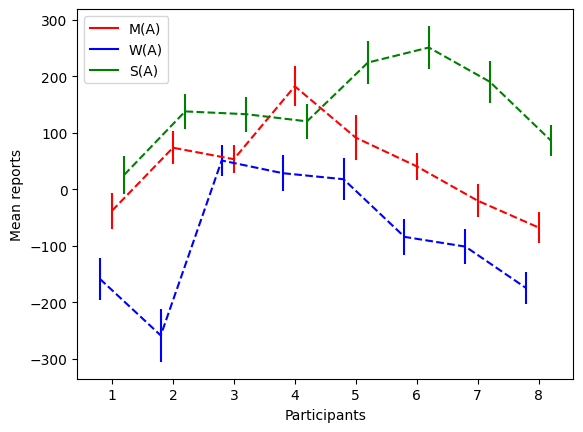

In [78]:
M_resp_timing = M_df.filter(regex='resp<>EMG').replace({"no EMG" : 0}).values
W_resp_timing = W_df.filter(regex='resp<>EMG').replace({"no EMG" : 0}).values
S_resp_timing = S_df.filter(regex='resp<>stimulus').replace({"no EMG" : 0}).values

M_avg = np.reshape(np.mean(M_resp_timing, axis=1), (-1, 2))
W_avg = np.reshape(np.mean(W_resp_timing, axis=1), (-1, 3))
S_avg = np.reshape(np.mean(S_resp_timing, axis=1), (-1, 2))

M_std = np.reshape(np.std(M_resp_timing, axis=1), (-1, 2))
W_std = np.reshape(np.std(W_resp_timing, axis=1), (-1, 3))
S_std = np.reshape(np.std(S_resp_timing, axis=1), (-1, 2))

M_avg = np.mean(np.nan_to_num(M_avg, nan=182), axis=1)
W_avg = np.mean(W_avg, axis=1)
S_avg = np.mean(S_avg, axis=1)

M_std = np.sqrt(np.mean(np.nan_to_num(M_std, nan=138.152), axis=1))
W_std = np.sqrt(np.mean(W_std, axis=1))
S_std = np.sqrt(np.mean(S_std, axis=1))

plt.errorbar(np.linspace(1,8,8), M_avg, yerr=3*M_std, linestyle='--', c='red')
plt.errorbar(np.linspace(1,8,8)-0.2, W_avg, yerr=3*W_std, linestyle='--', c='blue')
plt.errorbar(np.linspace(1,8,8)+0.2, S_avg, yerr=3*S_std, linestyle='--', c='green')

# create legend handles
h1 = Line2D([], [], c='r', label="M(A)")
h2 = Line2D([], [], c='b', label="W(A)")
h3 = Line2D([], [], c='g', label="S(A)")
plt.legend(handles=[h1, h2, h3])

plt.xlabel('Participants')
plt.ylabel('Mean reports')

plt.show()


### Question 8
Reconstruct the figure 6 of the article. The grand-averaged ERPs

(3304, 1)


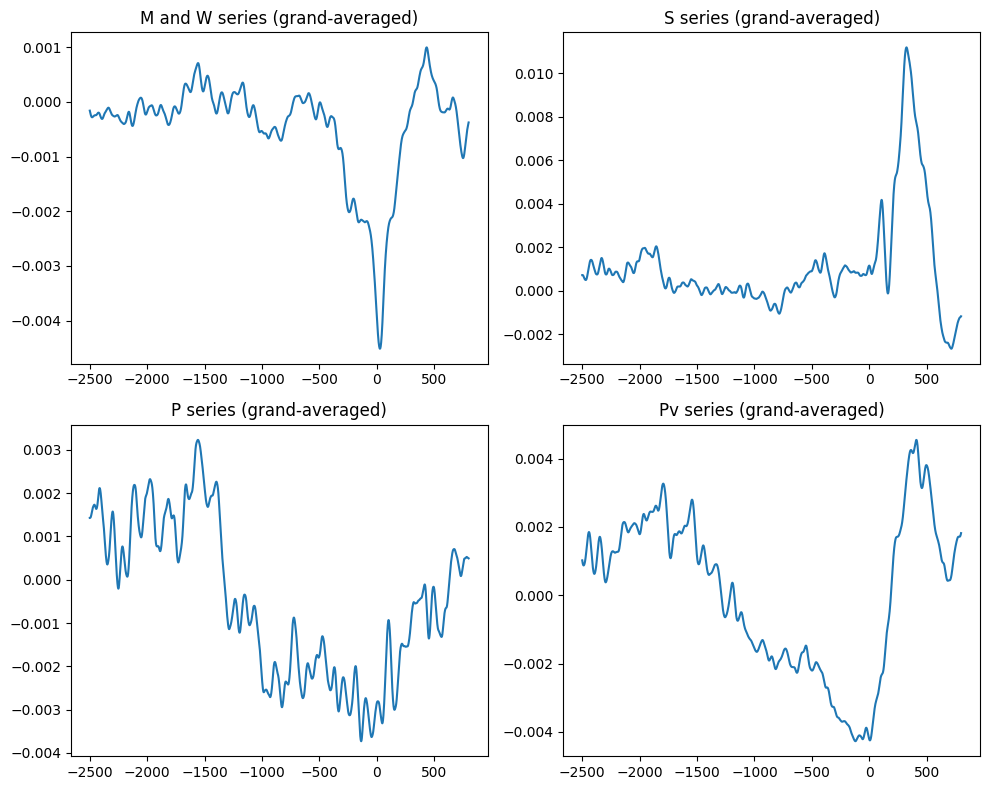

In [3]:
df = pd.read_excel("EEG plots file.xlsx", sheet_name='Grand Average')

MW_data = df.loc[(df['electrode'] == 'Cz') & (df['series'] == 'W/M')].values.T
S_data = df.loc[(df['electrode'] == 'Cz') & (df['series'] == 'S')].values.T
P_data = df.loc[(df['electrode'] == 'Cz') & (df['series'] == 'P')].values.T
Pv_data = df.loc[(df['electrode'] == 'Cz') & (df['series'] == 'Pv')].values.T

# Vectorize data
MW_data = np.reshape(MW_data[3:], -1)
S_data = np.reshape(S_data[3:], -1)
P_data = np.reshape(P_data[3:], -1)
Pv_data = np.reshape(Pv_data[3:], -1)
t = np.linspace(-2500,800,3301)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0, 0].plot(t, MW_data)
ax[0, 1].plot(t, S_data)
ax[1, 0].plot(t, P_data)
ax[1, 1].plot(t, Pv_data)
ax[0, 0].set_title('M and W series (grand-averaged)')
ax[0, 1].set_title('S series (grand-averaged)')
ax[1, 0].set_title('P series (grand-averaged)')
ax[1, 1].set_title('Pv series (grand-averaged)')

plt.tight_layout()
plt.show()

In [6]:
df = pd.read_excel("EEG plots file.xlsx", sheet_name='Individual EEG')

In [7]:
def create_personal_data(id):

    M_data = df.loc[(df['electrode'] == 'cz') & (df['series'] == 'M') & (df['participant'] == id)].values.T
    W_data = df.loc[(df['electrode'] == 'cz') & (df['series'] == 'W') & (df['participant'] == id)].values.T
    S_data = df.loc[(df['electrode'] == 'cz') & (df['series'] == 'S') & (df['participant'] == id)].values.T
    P_data = df.loc[(df['electrode'] == 'cz') & (df['series'] == 'P') & (df['participant'] == id)].values.T
    Pv_data = df.loc[(df['electrode'] == 'cz') & (df['series'] == 'Pv') & (df['participant'] == id)].values.T

    M_data = M_data[11:]
    W_data = W_data[11:]
    S_data = S_data[11:]
    P_data = P_data[11:]
    Pv_data = Pv_data[11:]

    dict = {
        "M_data" : M_data,
        "W_data" : W_data,
        "S_data" : S_data,
        "P_data" : P_data,
        "Pv_data" : Pv_data
    }

    remove_data = []
    for data in dict:
        if dict[data].shape[1] == 0:
            remove_data.append(data)
    for item in remove_data:
        dict.pop(item)

    return dict

p1_dict = create_personal_data(1)
p2_dict = create_personal_data(2)
p3_dict = create_personal_data(3)
p4_dict = create_personal_data(4)
p5_dict = create_personal_data(5)
p6_dict = create_personal_data(6)
p7_dict = create_personal_data(7)
p8_dict = create_personal_data(8)


In [8]:
all_dict = [p1_dict, p2_dict, p3_dict, p4_dict,
            p5_dict, p6_dict, p7_dict, p8_dict]

p1_dict['M_data'].shape

(3301, 4)

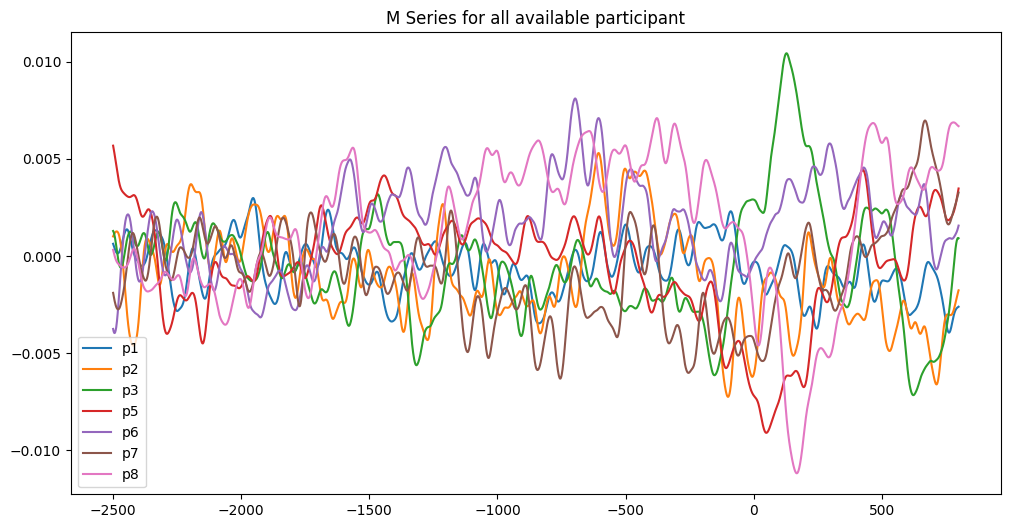

In [9]:
t = np.linspace(-2500,800,3301)

data = []
labels = []
for i in range(len(all_dict)):
    if 'M_data' in all_dict[i].keys():
        data.append(all_dict[i])
        labels.append('p'+str(i+1))
plt.figure(figsize=(12,6))
plt.title('M Series for all available participant')
for i in range(len(data)):
    plt.plot(t, data[i]['M_data'][:,0], label=labels[i])
plt.legend()
plt.show()

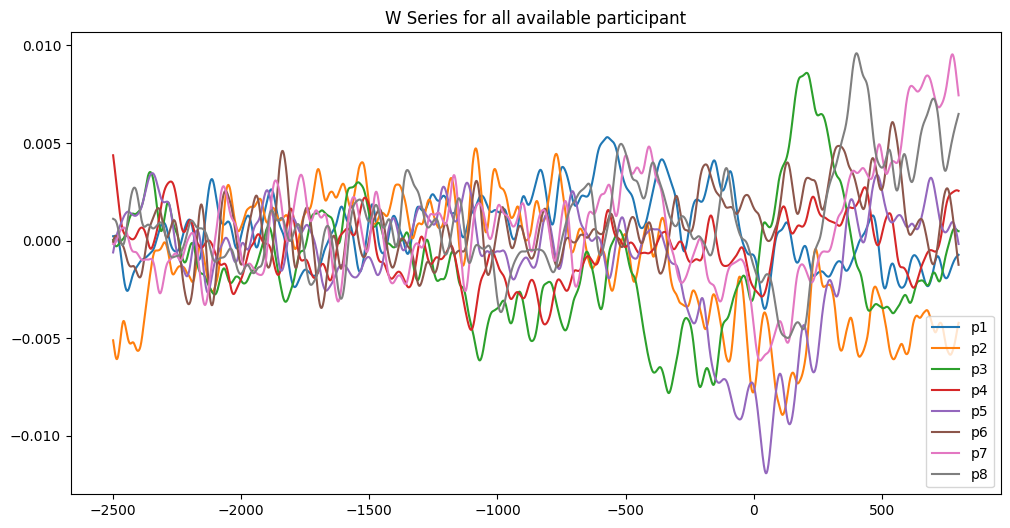

In [15]:
data = []
labels = []
for i in range(len(all_dict)):
    if 'W_data' in all_dict[i].keys():
        data.append(all_dict[i])
        labels.append('p'+str(i+1))

plt.figure(figsize=(12,6))
plt.title('W Series for all available participant')
for i in range(len(data)):
    plt.plot(t, data[i]['W_data'][:,0], label=labels[i])
plt.legend()
plt.show()

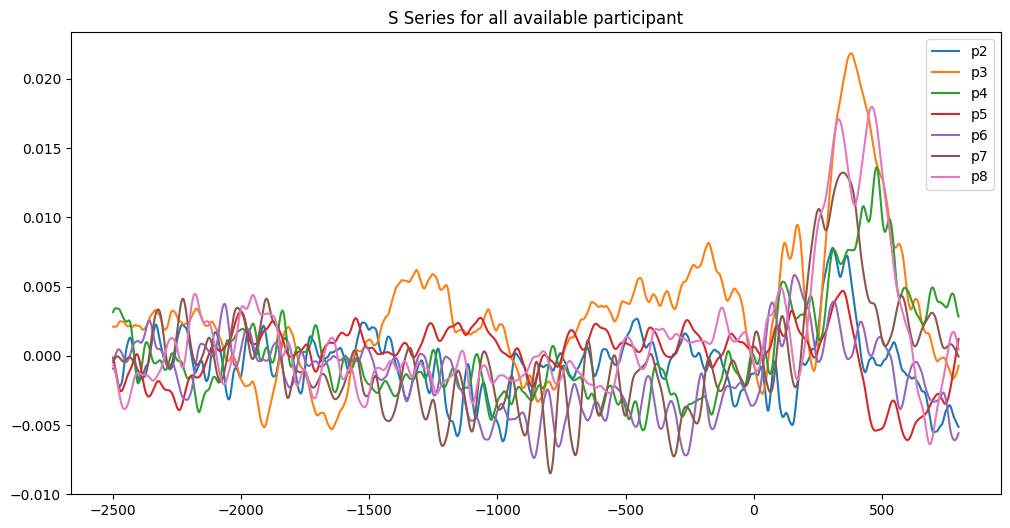

In [11]:
data = []
labels = []
for i in range(len(all_dict)):
    if 'S_data' in all_dict[i].keys():
        data.append(all_dict[i])
        labels.append('p'+str(i+1))

plt.figure(figsize=(12,6))
plt.title('S Series for all available participant')
for i in range(len(data)):
    plt.plot(t, data[i]['S_data'][:,0], label=labels[i])
plt.legend()
plt.show()

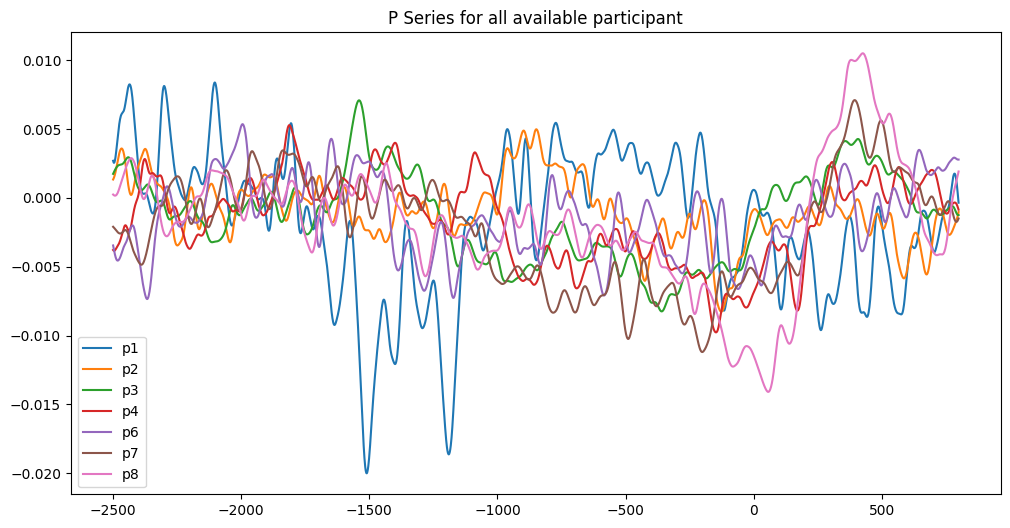

In [12]:
data = []
labels = []
for i in range(len(all_dict)):
    if 'P_data' in all_dict[i].keys():
        data.append(all_dict[i])
        labels.append('p'+str(i+1))

plt.figure(figsize=(12,6))
plt.title('P Series for all available participant')
for i in range(len(data)):
    plt.plot(t, data[i]['P_data'][:,0], label=labels[i])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


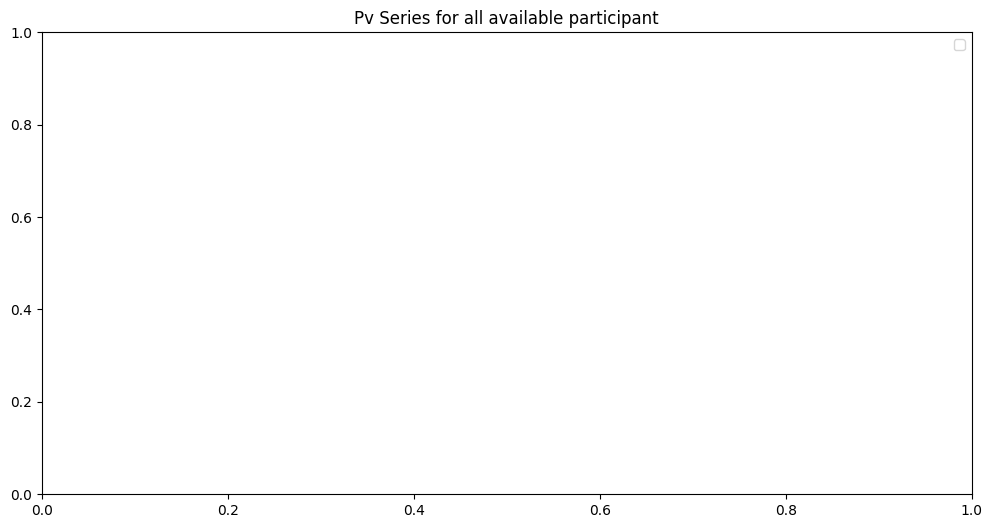

In [13]:
data = []
labels = []
for i in range(len(all_dict)):
    if 'Pv_data' in all_dict[i].keys():
        data.append(all_dict[i])
        labels.append('p'+str(i+1))

plt.figure(figsize=(12,6))
plt.title('Pv Series for all available participant')
for i in range(len(data)):
    plt.plot(t, data[i]['Pv_data'][:,0], label=labels[i])
plt.legend()
plt.show()